# Data Exploration

This file is for an initial exploration, or EDA for this project.

In [3]:
#load in needed packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
#%cd ../../../../data/p_dsi/teams2023/asurion_data/

In [5]:
df = pd.read_excel('Asurion_data.xlsx')

In [6]:
df

,phone model,phone size,phone color,claim,weeks_monday
0,alcatel axel,32gb,black,1,2022-01-24
1,alcatel axel,32gb,black,3,2022-11-14
2,alcatel axel,32gb,black,1,2022-11-21
3,alcatel axel,32gb,black,3,2022-11-28
4,alcatel axel,32gb,black,1,2022-12-12
...,...,...,...,...,...
26656,samsung galaxy z fold3 5g,256gb,silver,17,2023-01-30
26657,samsung galaxy z fold3 5g,256gb,silver,26,2023-02-06
26658,samsung galaxy z fold3 5g,256gb,silver,4,2023-02-13
26659,samsung galaxy z fold3 5g,512gb,black,61,2023-02-06


Get information about the data sets’ columns, data types, and non-null values using df.info().

In [7]:
df.info() #taking a look at the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26661 entries, 0 to 26660
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   phone model   26661 non-null  object        
 1   phone size    26661 non-null  object        
 2   phone color   26661 non-null  object        
 3   claim         26661 non-null  int64         
 4   weeks_monday  26661 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [8]:
df.head(10) #display the first 10 rows of the dataset

,phone model,phone size,phone color,claim,weeks_monday
0,alcatel axel,32gb,black,1,2022-01-24
1,alcatel axel,32gb,black,3,2022-11-14
2,alcatel axel,32gb,black,1,2022-11-21
3,alcatel axel,32gb,black,3,2022-11-28
4,alcatel axel,32gb,black,1,2022-12-12
5,alcatel smartflip 4052r,4gb,black,1,2022-07-04
6,alcatel smartflip 4052r,4gb,black,1,2022-07-25
7,alcatel smartflip 4052r,4gb,black,3,2022-08-01
8,alcatel smartflip 4052r,4gb,black,1,2022-08-08
9,alcatel smartflip 4052r,4gb,black,1,2022-08-15


Display the statistics descriptive for the dataset using df.describe(). For numeric data, the result’s index will include count, mean, std, min, and max, as well as lower, middle (median), and upper percentiles.

In [9]:
df.describe()

,claim
count,26661.000000
mean,39.674281
std,62.150464
min,1.000000
25%,4.000000
50%,14.000000
75%,49.000000
max,566.000000


Checking for missingness:

In [10]:
df.isnull().sum()

phone model     0
phone size      0
phone color     0
claim           0
weeks_monday    0
dtype: int64

There are no missing values in the data.

Next, let's explore how many models of phones we have.

In [11]:
print(df['phone model'].unique())
len((df['phone model'].unique()))
#lets see how many types of phones we have 

['alcatel axel' 'alcatel smartflip 4052r' 'alcatel tetra'
 'apple iphone 11' 'apple iphone 11 pro' 'apple iphone 11 pro max'
 'apple iphone 12' 'apple iphone 12 mini' 'apple iphone 12 pro'
 'apple iphone 12 pro max' 'apple iphone 13' 'apple iphone 13 mini'
 'apple iphone 13 pro' 'apple iphone 13 pro max' 'apple iphone 14'
 'apple iphone 14 pro max' 'apple iphone 3g s' 'apple iphone 4'
 'apple iphone 4s' 'apple iphone 5' 'apple iphone 5c' 'apple iphone 5s'
 'apple iphone 6' 'apple iphone 6 plus' 'apple iphone 6s'
 'apple iphone 6s plus' 'apple iphone 7' 'apple iphone 7 plus'
 'apple iphone 8' 'apple iphone 8 plus' 'apple iphone se'
 'apple iphone se 2020' 'apple iphone se 2022' 'apple iphone x 256'
 'apple iphone x 64' 'apple iphone xr' 'apple iphone xs'
 'apple iphone xs max' 'at t cingular flip iv' 'google pixel 4'
 'google pixel 4 xl' 'google pixel 4a 5g' 'google pixel 5'
 'google pixel 6' 'google pixel 6 pro' 'kyocera duraforce pro 2'
 'lg arena 2' 'lg g6 duo' 'lg g8 thinq' 'lg g8x 

128

In [13]:
#group by "phone model" and "phone size" with "claim" count and "claim" sum
df.groupby(['phone model', 'phone size'])['claim'].agg(['count', 'sum'])

count    sum
phone model               phone size              
alcatel axel              32gb            5      9
alcatel smartflip 4052r   4gb            23     47
alcatel tetra             16gb            4      4
apple iphone 11           128gb         516  45545
                          256gb         480   5054
...                                     ...    ...
samsung galaxy z flip4 5g 128gb           6    198
                          256gb           5    119
samsung galaxy z fold2 5g 256gb         124   2755
samsung galaxy z fold3 5g 256gb         165  12561
                          512gb           2     77

[199 rows x 2 columns]

In [ ]:
#group by "phone model" with "claim" count and "claim" sum
df.groupby("phone model")["claim"].agg(["count", "sum"])

,count,sum
phone model,,
alcatel axel,5,9
alcatel smartflip 4052r,23,47
alcatel tetra,4,4
apple iphone 11,1511,127398
apple iphone 11 pro,584,26983
apple iphone 11 pro max,932,74451
apple iphone 12,1121,66651
apple iphone 12 mini,536,11022
apple iphone 12 pro,653,37304


Let's see how many phone models (regardless of storage size) have more than 100 claims (our cut-off value for if it can be used in our analysis.)

In [ ]:
#group by "phone model" with "claim" count greater than 100 in descending order
df.groupby("phone model")["claim"].agg(["count"]).query("count > 100").sort_values("count", ascending=False)
#len(df.groupby("phone model")["claim"].agg(["count"]).query("count > 100").sort_values("count", ascending=False))
#there are 57 phone models with more than 100 claims

This output will help us narrow down & determine what data we can use. Out of the 128 types of phone models, only 57 will be usable for us. 
It is notable that the first usable samsung phone has only 425 claims.

Next, let's create a histogram/bar plot that shows the number of claims for each phone type, shown in descending order. 

[Text(0,0,'apple iphone 11'),
 Text(0,0,'apple iphone xr'),
 Text(0,0,'apple iphone 12'),
 Text(0,0,'apple iphone 11 pro max'),
 Text(0,0,'apple iphone 6s'),
 Text(0,0,'apple iphone 12 pro max'),
 Text(0,0,'apple iphone 8 plus'),
 Text(0,0,'apple iphone 6s plus'),
 Text(0,0,'apple iphone 7 plus'),
 Text(0,0,'apple iphone 8'),
 Text(0,0,'apple iphone 7'),
 Text(0,0,'apple iphone xs max'),
 Text(0,0,'apple iphone 12 pro'),
 Text(0,0,'apple iphone 13 pro max'),
 Text(0,0,'apple iphone 11 pro'),
 Text(0,0,'apple iphone 6'),
 Text(0,0,'apple iphone 12 mini'),
 Text(0,0,'apple iphone xs'),
 Text(0,0,'apple iphone 6 plus'),
 Text(0,0,'apple iphone 13'),
 Text(0,0,'apple iphone se'),
 Text(0,0,'samsung galaxy s10 plus'),
 Text(0,0,'apple iphone 13 pro'),
 Text(0,0,'apple iphone se 2020'),
 Text(0,0,'samsung galaxy s7 edge'),
 Text(0,0,'samsung galaxy note 9'),
 Text(0,0,'samsung galaxy s8'),
 Text(0,0,'samsung galaxy s8 plus'),
 Text(0,0,'samsung galaxy note 20 ultra 5g'),
 Text(0,0,'samsung g

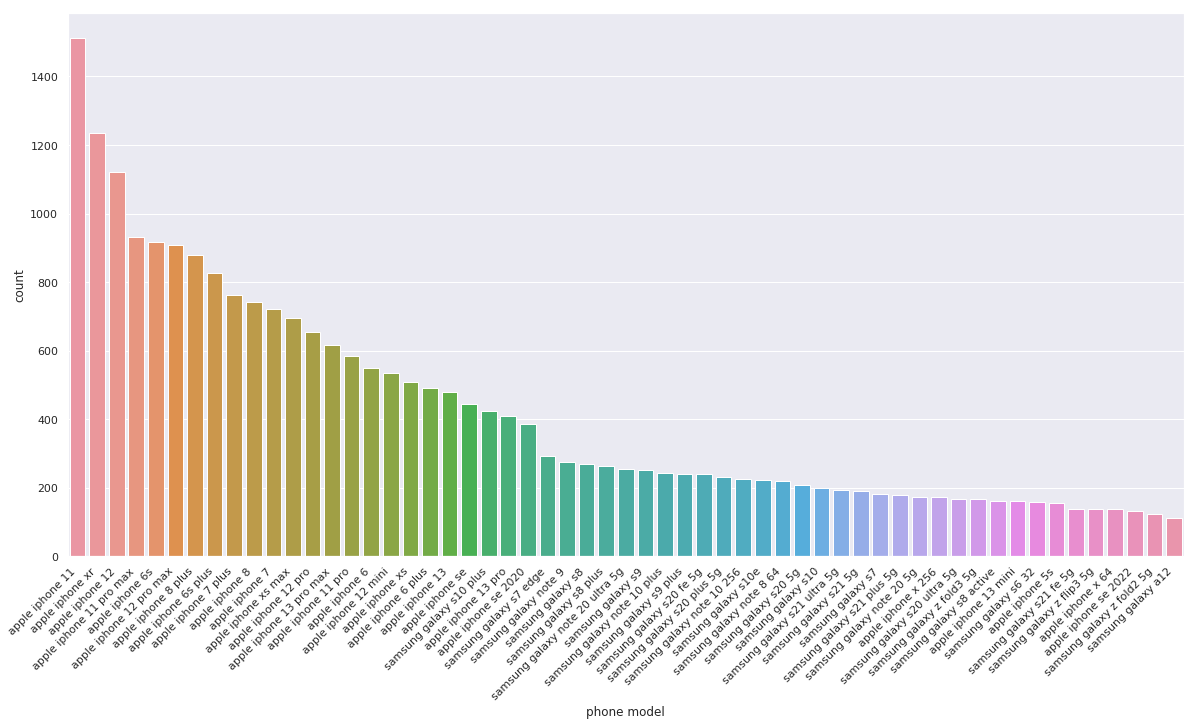

In [ ]:
#create barplot of "claim" count grouped by "phone model" using seaborn, with the font readable and x-axis labels tilted diagonally
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})

chart = sns.barplot(x="phone model", y="count", data=df.groupby("phone model")["claim"].agg(["count"]).query("count > 100").sort_values("count", ascending=False).reset_index())



chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Let's examine just the iphones for a bit. This could be insightful because our goal is to predict iphone 14 claims.

In [ ]:
#create a subset of the data with only iphone models
df_iphone = df[df["phone model"].str.contains("apple")]
df_iphone

Let's examine the iphones with the highest claims grouped by model and color.

[Text(0,0,'128gb'),
 Text(0,0,'16gb'),
 Text(0,0,'256gb'),
 Text(0,0,'32gb'),
 Text(0,0,'512gb'),
 Text(0,0,'64gb'),
 Text(0,0,'8gb'),
 Text(0,0,'gb')]

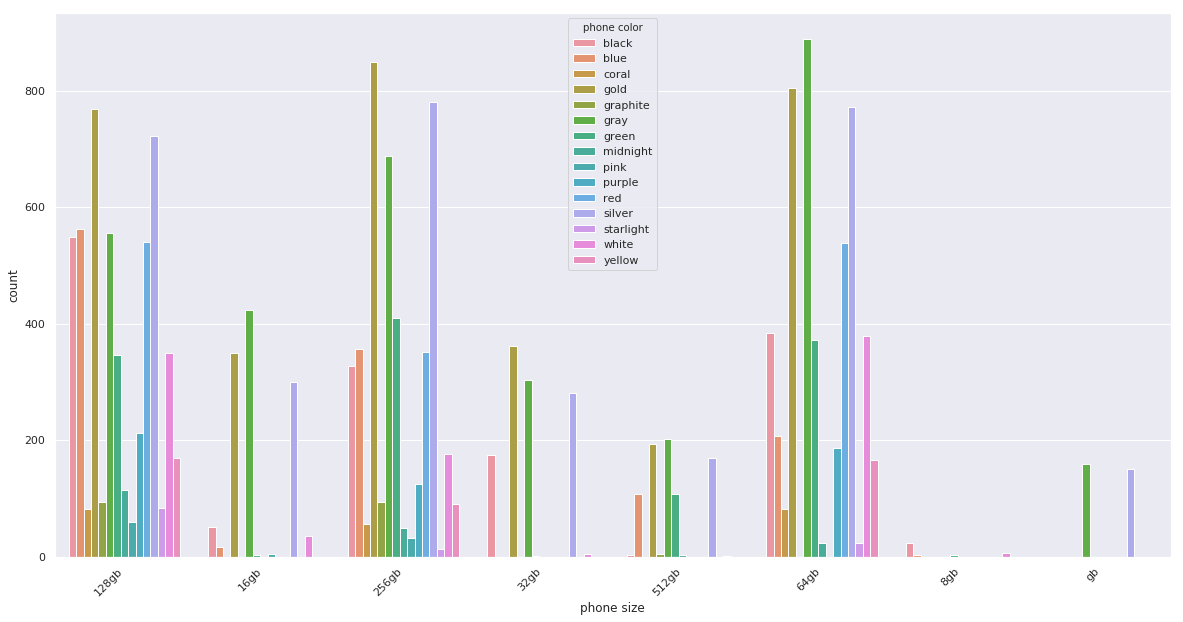

In [ ]:
#create barplot of "claim" count grouped by "phone size" and "phone color" using seaborn, with the font readable and x-axis labels tilted diagonally
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
chart = sns.barplot(x="phone size", y="count", hue="phone color", data=df_iphone.groupby(["phone size", "phone color"])["claim"].agg(["count"]).reset_index())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


In [ ]:
#display the top 15 phone models with the most claims, grouped by phone model, phone size, and phone color
df.groupby(["phone model", "phone size", "phone color"])["claim"].agg(["sum"]).sort_values("sum", ascending=False).head(15)

sum
phone model                     phone size phone color       
apple iphone 11                 64gb       black        28645
apple iphone 12 pro max         128gb      blue         27637
                                           gray         25513
                                256gb      blue         21800
samsung galaxy note 20 ultra 5g 128gb      black        20244
apple iphone 11                 128gb      black        19978
samsung galaxy s21 ultra 5g     128gb      black        19426
apple iphone xr                 64gb       black        17690
apple iphone 11                 64gb       white        15368
apple iphone 11 pro max         256gb      gray         14880
apple iphone 12 pro max         256gb      gray         14025
samsung galaxy a12              32gb       black        13783
apple iphone 12 pro max         128gb      gold         13541
apple iphone 11 pro max         256gb      green        13454
apple iphone 13 pro max         128gb      blue         12852

Each claim count says 86 -> this has to be an error of sorts?

Let's display the top 10 iphones with the most claims, regardless of storage or color.

The iphone 11,XR, and 12 all have over 1,000 claims. These may be the most helpful in predicting the iphone 14 claims.

In [ ]:
df_iphone.groupby("phone model")["claim"].agg(["count"]).sort_values("count", ascending=False).head(10)

,count
phone model,
apple iphone 11,1511
apple iphone xr,1235
apple iphone 12,1121
apple iphone 11 pro max,932
apple iphone 6s,916
apple iphone 12 pro max,909
apple iphone 8 plus,878
apple iphone 6s plus,826
apple iphone 7 plus,761


Now, let's try to show trends over time.

/accre/arch/easybuild/software/MPI/GCC/6.4.0-2.28/OpenMPI/2.1.1/scipy/0.19.1-Python-3.6.3/lib/python3.6/site-packages/scipy-0.19.1-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

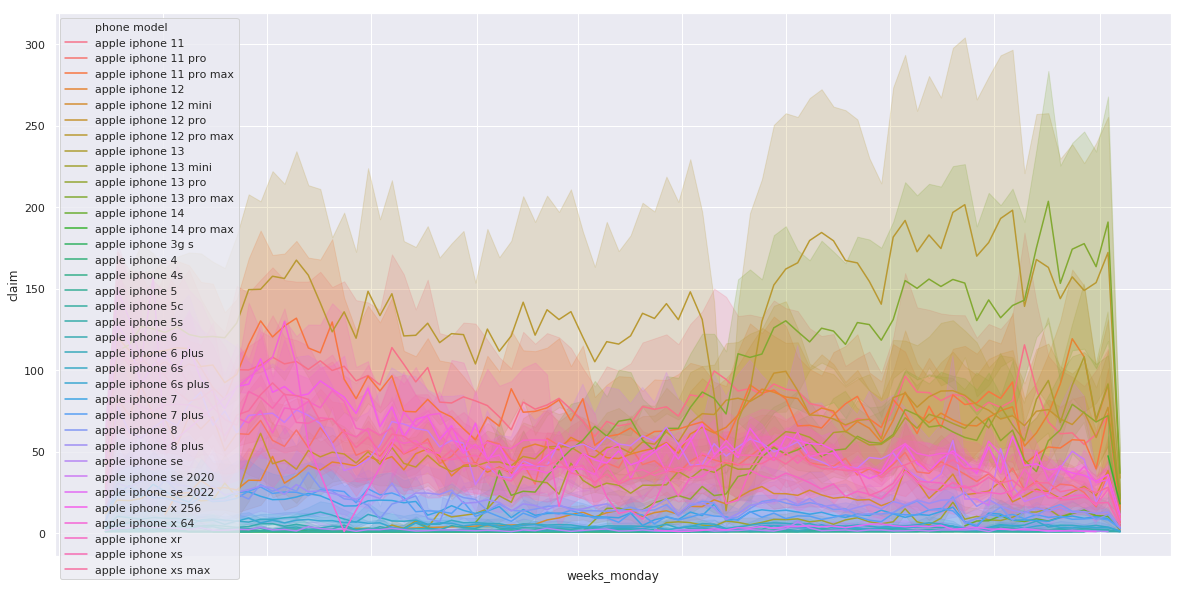

In [ ]:
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
chart = sns.lineplot(x="weeks_monday", y="claim", hue="phone model", data=df_iphone)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Plotting all of iphones looks very messy. Let's try plotting a smaller amount to help the visual.

In [ ]:
#creating a subset of data with just top 5 iphone models
df_iphone_top5 = df_iphone[df_iphone["phone model"].isin(["apple iphone 7 plus", "apple iphone 7", "apple iphone 6s plus", "apple iphone 6s", "apple iphone 6 plus"])]
df_iphone_top5

,phone model,phone size,phone color,claim,weeks_monday
8867,apple iphone 6 plus,128gb,gold,2,2021-07-05
8868,apple iphone 6 plus,128gb,gold,2,2021-07-26
8869,apple iphone 6 plus,128gb,gold,2,2021-08-02
8870,apple iphone 6 plus,128gb,gold,2,2021-08-09
8871,apple iphone 6 plus,128gb,gold,2,2021-08-16
8872,apple iphone 6 plus,128gb,gold,1,2021-08-30
8873,apple iphone 6 plus,128gb,gold,1,2021-09-06
8874,apple iphone 6 plus,128gb,gold,2,2021-09-13
8875,apple iphone 6 plus,128gb,gold,1,2021-10-11
8876,apple iphone 6 plus,128gb,gold,2,2021-10-25


/accre/arch/easybuild/software/MPI/GCC/6.4.0-2.28/OpenMPI/2.1.1/scipy/0.19.1-Python-3.6.3/lib/python3.6/site-packages/scipy-0.19.1-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

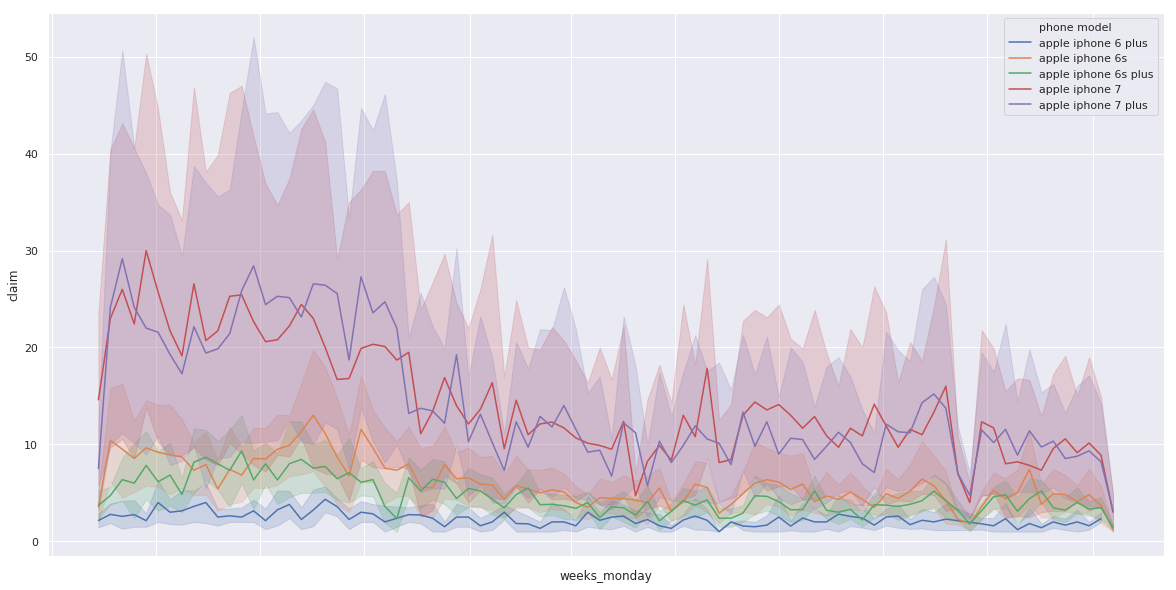

In [ ]:
#plotting these over time
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
chart = sns.lineplot(x="weeks_monday", y="claim", hue="phone model", data=df_iphone_top5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0,0,'2021-06-28T00:00:00.000000000'),
 Text(0,0,'2021-07-05T00:00:00.000000000'),
 Text(0,0,'2021-07-12T00:00:00.000000000'),
 Text(0,0,'2021-07-19T00:00:00.000000000'),
 Text(0,0,'2021-07-26T00:00:00.000000000'),
 Text(0,0,'2021-08-02T00:00:00.000000000'),
 Text(0,0,'2021-08-09T00:00:00.000000000'),
 Text(0,0,'2021-08-16T00:00:00.000000000'),
 Text(0,0,'2021-08-23T00:00:00.000000000'),
 Text(0,0,'2021-08-30T00:00:00.000000000'),
 Text(0,0,'2021-09-06T00:00:00.000000000'),
 Text(0,0,'2021-09-13T00:00:00.000000000'),
 Text(0,0,'2021-09-20T00:00:00.000000000'),
 Text(0,0,'2021-09-27T00:00:00.000000000'),
 Text(0,0,'2021-10-04T00:00:00.000000000'),
 Text(0,0,'2021-10-11T00:00:00.000000000'),
 Text(0,0,'2021-10-18T00:00:00.000000000'),
 Text(0,0,'2021-10-25T00:00:00.000000000'),
 Text(0,0,'2021-11-01T00:00:00.000000000'),
 Text(0,0,'2021-11-08T00:00:00.000000000'),
 Text(0,0,'2021-11-15T00:00:00.000000000'),
 Text(0,0,'2021-11-22T00:00:00.000000000'),
 Text(0,0,'2021-11-29T00:00:00.0

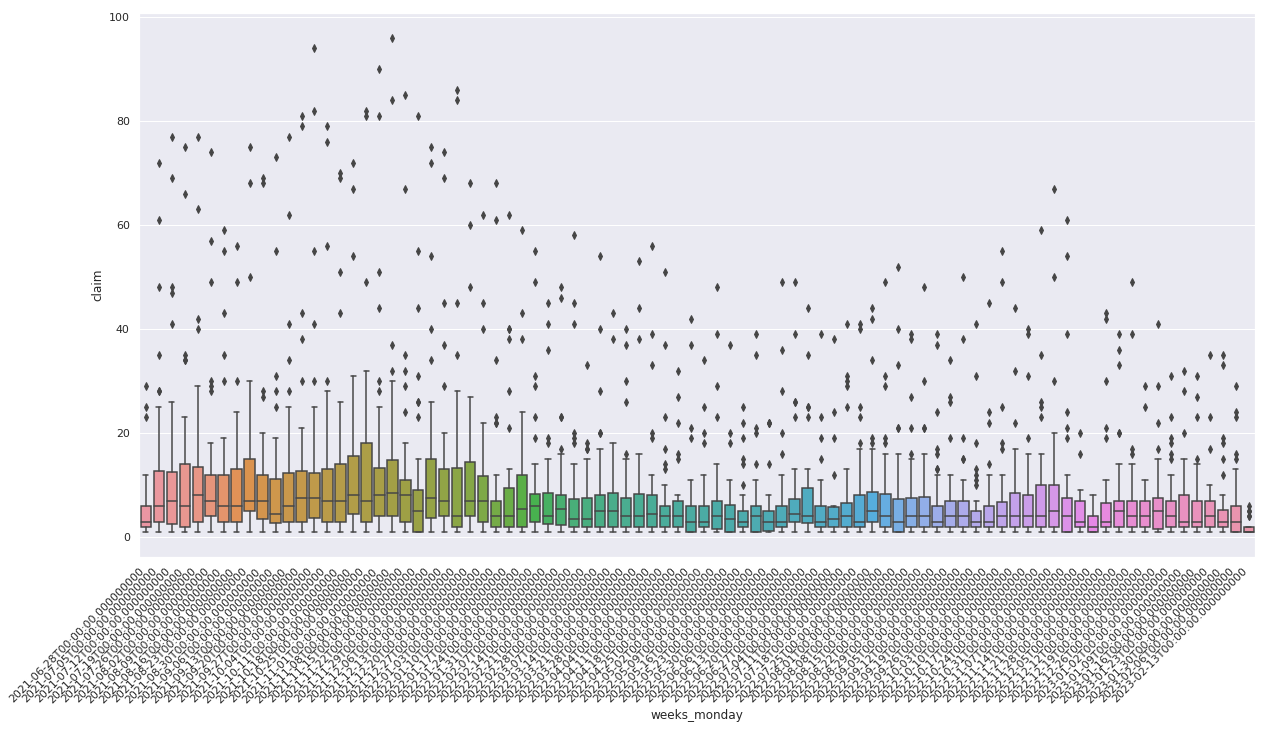

In [ ]:
#create a box and whisker plot of the df_iphone_top5 data grouped by "weeks_monday"
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
chart = sns.boxplot(x="weeks_monday", y="claim", data=df_iphone_top5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Next I'll create box and whisker plots by consistent intervals (in this case, the monday week date.)

Within an interval, it can help to spot outliers (dots above or below the whiskers). Across intervals, we can look for multiple year trends, seasonality, and other structural information that could be modeled.

Source: https://machinelearningmastery.com/time-series-data-visualization-with-python/

[Text(0,0,'2021-06-28T00:00:00.000000000'),
 Text(0,0,'2021-07-05T00:00:00.000000000'),
 Text(0,0,'2021-07-12T00:00:00.000000000'),
 Text(0,0,'2021-07-19T00:00:00.000000000'),
 Text(0,0,'2021-07-26T00:00:00.000000000'),
 Text(0,0,'2021-08-02T00:00:00.000000000'),
 Text(0,0,'2021-08-09T00:00:00.000000000'),
 Text(0,0,'2021-08-16T00:00:00.000000000'),
 Text(0,0,'2021-08-23T00:00:00.000000000'),
 Text(0,0,'2021-08-30T00:00:00.000000000'),
 Text(0,0,'2021-09-06T00:00:00.000000000'),
 Text(0,0,'2021-09-13T00:00:00.000000000'),
 Text(0,0,'2021-09-20T00:00:00.000000000'),
 Text(0,0,'2021-09-27T00:00:00.000000000'),
 Text(0,0,'2021-10-04T00:00:00.000000000'),
 Text(0,0,'2021-10-11T00:00:00.000000000'),
 Text(0,0,'2021-10-18T00:00:00.000000000'),
 Text(0,0,'2021-10-25T00:00:00.000000000'),
 Text(0,0,'2021-11-01T00:00:00.000000000'),
 Text(0,0,'2021-11-08T00:00:00.000000000'),
 Text(0,0,'2021-11-15T00:00:00.000000000'),
 Text(0,0,'2021-11-22T00:00:00.000000000'),
 Text(0,0,'2021-11-29T00:00:00.0

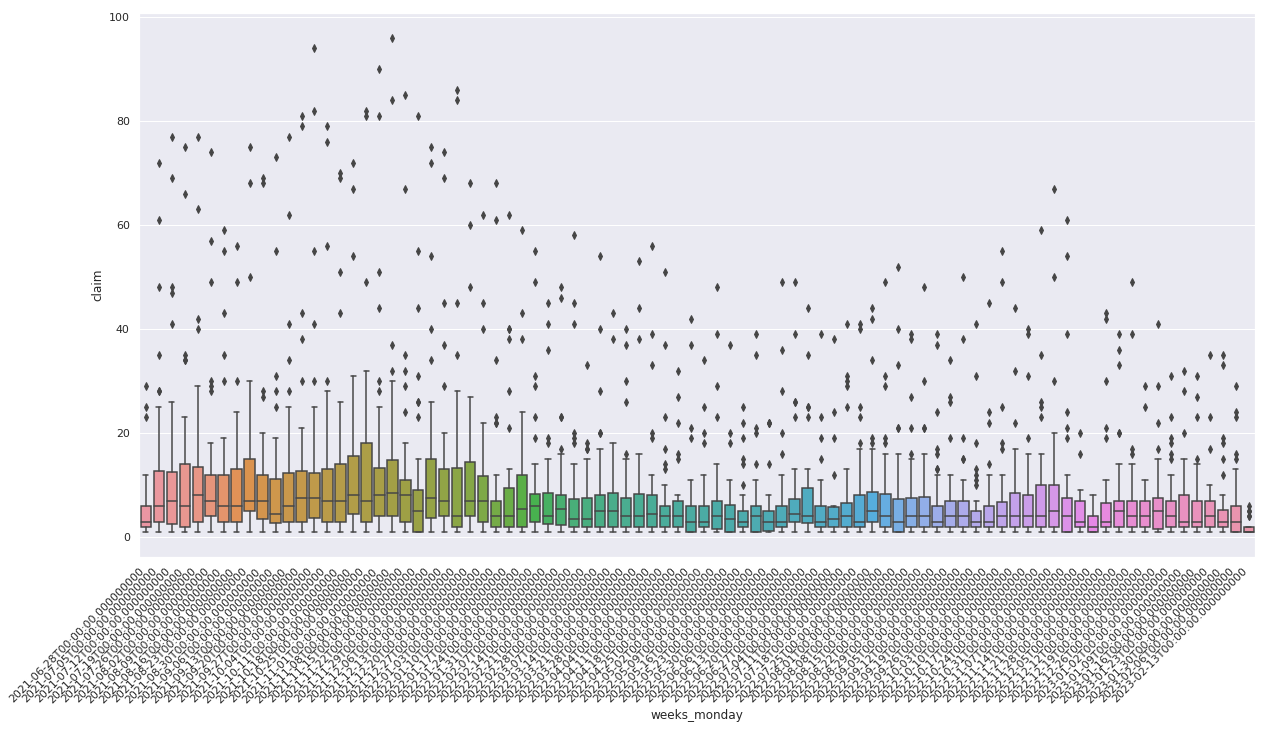

In [ ]:
#create a box and whisker plot of the df_iphone_top5 data grouped by "weeks_monday"
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
chart = sns.boxplot(x="weeks_monday", y="claim", data=df_iphone_top5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


This plot is a little hard to read. Let's just examine the top iphone, the iphone 11.

In [ ]:
#creating a subset of the data that is just the model "iphone 11"
df_iphone_11 = df_iphone[df_iphone["phone model"] == "apple iphone 11"]
df_iphone_11

,phone model,phone size,phone color,claim,weeks_monday
32,apple iphone 11,128gb,black,111,2021-06-28
33,apple iphone 11,128gb,black,319,2021-07-05
34,apple iphone 11,128gb,black,320,2021-07-12
35,apple iphone 11,128gb,black,305,2021-07-19
36,apple iphone 11,128gb,black,269,2021-07-26
37,apple iphone 11,128gb,black,301,2021-08-02
38,apple iphone 11,128gb,black,313,2021-08-09
39,apple iphone 11,128gb,black,354,2021-08-16
40,apple iphone 11,128gb,black,253,2021-08-23
41,apple iphone 11,128gb,black,223,2021-08-30


[Text(0,0,'2021-06-28T00:00:00.000000000'),
 Text(0,0,'2021-07-05T00:00:00.000000000'),
 Text(0,0,'2021-07-12T00:00:00.000000000'),
 Text(0,0,'2021-07-19T00:00:00.000000000'),
 Text(0,0,'2021-07-26T00:00:00.000000000'),
 Text(0,0,'2021-08-02T00:00:00.000000000'),
 Text(0,0,'2021-08-09T00:00:00.000000000'),
 Text(0,0,'2021-08-16T00:00:00.000000000'),
 Text(0,0,'2021-08-23T00:00:00.000000000'),
 Text(0,0,'2021-08-30T00:00:00.000000000'),
 Text(0,0,'2021-09-06T00:00:00.000000000'),
 Text(0,0,'2021-09-13T00:00:00.000000000'),
 Text(0,0,'2021-09-20T00:00:00.000000000'),
 Text(0,0,'2021-09-27T00:00:00.000000000'),
 Text(0,0,'2021-10-04T00:00:00.000000000'),
 Text(0,0,'2021-10-11T00:00:00.000000000'),
 Text(0,0,'2021-10-18T00:00:00.000000000'),
 Text(0,0,'2021-10-25T00:00:00.000000000'),
 Text(0,0,'2021-11-01T00:00:00.000000000'),
 Text(0,0,'2021-11-08T00:00:00.000000000'),
 Text(0,0,'2021-11-15T00:00:00.000000000'),
 Text(0,0,'2021-11-22T00:00:00.000000000'),
 Text(0,0,'2021-11-29T00:00:00.0

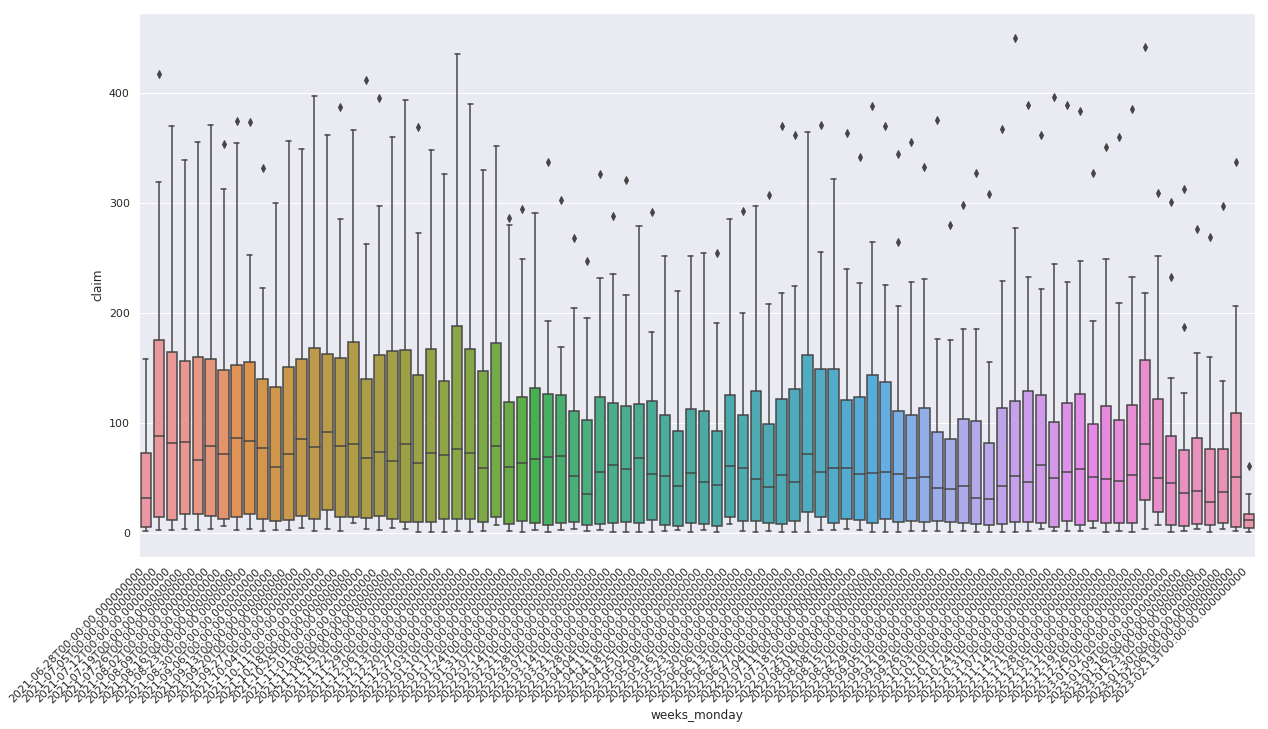

In [ ]:
#now re-doing the box and whisker plot of just the iphone11 grouped by "weeks_monday"
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
chart = sns.boxplot(x="weeks_monday", y="claim", data=df_iphone_11)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
